In [8]:
# Types of message IECWTD
from datetime import datetime
import pandas as pd
import re
import os
log_file="/path/of/file"
log_file="/home/mwaykole/temp/NLP/sosreport-rhsqa-grafton7-nic2-2020-10-28-xfmhycf/var/log/glusterfs/glusterd.log"

In [9]:

def all_file(log_path):
    """
    returns the list of all file in the directory
    args: 
        log_path: path of the dir or log file 
    """
    if not os.path.isdir(log_path):
        print("Not dir")
        return log_path
    file_list = []
    if os.path.isdir(log_path):
        for path in os.listdir(log_path):
            full_path = os.path.join(log_path, path)
            if os.path.isfile(full_path):
                file_list.append(full_path)
                
    return file_list

In [22]:

def glusterfs_log_parser(log_file_path, message_info,crash_time=None, no_of_log=None):
    """
    This method will parse glusterfs log  and display the count 
    args:
        log_file_path: Path of glusterfs file
        message_info: log level (IECWTD)
        
    
    """
    pattern = ('\[([^\]]+)\]\s([{}])\s(\[MSGID:\s([^\]]+)\]\s)?\[([^\]]+)\]\s([^:]+):\s(.+)'.format(message_info))
    log_pattern = re.compile(pattern)
    lst= []
    with open(log_file_path, 'r') as file:
        for line in file.readlines():
            matches =  log_pattern.finditer(line)
            for i in matches:
                lst.append(i.groups())
    df = pd.DataFrame(lst)
    df1 = df[df[6].duplicated()][6]
    df1 = pd.DataFrame(df1.value_counts())
    return (df,df1) 
    

In [19]:
fulldf,dupliacteeddf =glusterfs_log_parser(log_file,"C")

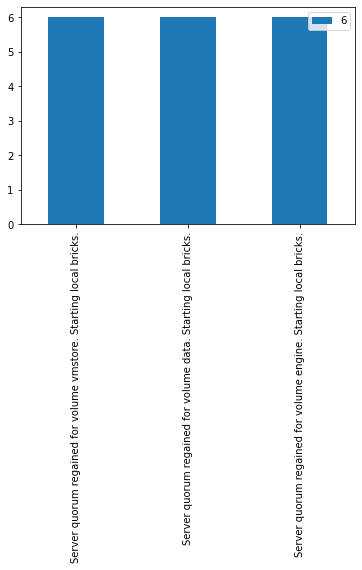

In [20]:
dupliacteeddf.plot.bar()

In [21]:
dupliacteeddf

,6
Server quorum regained for volume vmstore. Starting local bricks.,6
Server quorum regained for volume data. Starting local bricks.,6
Server quorum regained for volume engine. Starting local bricks.,6
